# Audit 2017-2018 Regular Season Players' Statistics

### Import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read 2017-2018 NBA Regular Season Players' Stats

In [69]:
df = pd.read_csv("/Users/QiJin/Desktop/Python/2017-2018 NBA Stats.csv")
df.head()

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
1,2,Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
2,3,LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
3,4,Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
4,5,Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9


### Step 1: Check data size

In [70]:
df.shape

(540, 23)

### Step 2: Check missing data

In [71]:
df.isnull().sum()

#         0
Player    0
Team      0
GP        0
MPG       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
TOV       0
PF        0
ORB       0
DRB       0
RPG       0
APG       0
SPG       0
BPG       0
PPG       0
dtype: int64

This dataset is perfect! It doesn’t need cleaning

### Step 3: Check the data type

In [72]:
df.dtypes

#           int64
Player     object
Team       object
GP          int64
MPG       float64
FGM       float64
FGA       float64
FG%       float64
3PM       float64
3PA       float64
3P%       float64
FTM       float64
FTA       float64
FT%       float64
TOV       float64
PF        float64
ORB       float64
DRB       float64
RPG       float64
APG       float64
SPG       float64
BPG       float64
PPG       float64
dtype: object

All are correct!

### Step 4: Audit data


**Plot the boxplot of Points Per Game of each player.**

{'whiskers': [<matplotlib.lines.Line2D at 0x1a22341978>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22341e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a22341400>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22348a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22348e80>],
 'means': []}

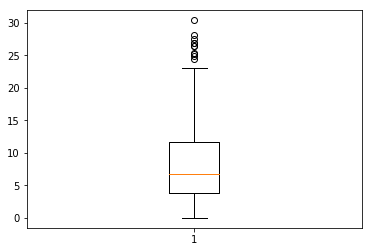

In [73]:
plt.boxplot(df['PPG'])

There are some outliers, let's check who are them.

In [74]:
df.loc[df['PPG']>24]

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
1,2,Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
2,3,LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
3,4,Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
4,5,Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9
5,6,Stephen Curry,GSW,51,32.0,8.4,16.9,0.495,4.2,9.8,...,0.921,3.0,2.2,0.7,4.4,5.1,6.1,1.6,0.2,26.4
6,7,Kevin Durant,GSW,68,34.2,9.3,18.0,0.516,2.5,6.1,...,0.889,3.0,2.0,0.5,6.4,6.8,5.4,0.7,1.8,26.4
7,8,Russell Westbrook,OKC,80,36.4,9.5,21.1,0.449,1.2,4.1,...,0.737,4.8,2.5,1.9,8.2,10.1,10.2,1.8,0.2,25.4
8,9,DeMarcus Cousins,NOP,48,36.2,8.5,18.0,0.470,2.2,6.1,...,0.746,5.0,3.8,2.2,10.7,12.9,5.4,1.7,1.6,25.2
9,10,Devin Booker,PHX,54,34.5,8.4,19.5,0.432,2.7,7.1,...,0.878,3.6,3.1,0.5,4.0,4.5,4.7,0.9,0.3,24.9


All of these players are the top players, and way much better than others. So it makes scense why there are some outliers.

**The distribution of Percentage of Field Goal**

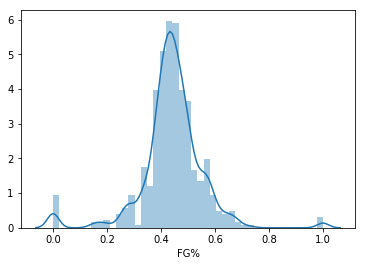

In [75]:
import seaborn as sns
sns.distplot(df['FG%'])

It is reasonable because most players are in the median level.

In [76]:
df.min()

#                    1
Player    Aaron Brooks
Team               ATL
GP                   1
MPG                0.5
FGM                  0
FGA                  0
FG%                  0
3PM                  0
3PA                  0
3P%                  0
FTM                  0
FTA                  0
FT%                  0
TOV                  0
PF                   0
ORB                  0
DRB                  0
RPG                  0
APG                  0
SPG                  0
BPG                  0
PPG                  0
dtype: object

There are no negative value in this dataset!

**Perfect!**

### Finally, I have to check whether the Players' names are same as names in Salary table.

In [77]:
df_sal = pd.read_csv("/Users/QiJin/Desktop/Python/NBA_Salary.csv")
df_sal.head()

,Player,Team,Salary,AllStar
0,Stephen Curry,GSW,34682550.0,True
1,LeBron James,CLE,33285709.0,True
2,Paul Millsap,DEN,31269231.0,False
3,Gordon Hayward,BOS,29727900.0,False
4,Blake Griffin,DET,29512900.0,False


In [78]:
df_stats = df
df_stats.head()

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
0,1,James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
1,2,Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
2,3,LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
3,4,Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
4,5,Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9


In [79]:
len(df_stats['Player'])

540

In [80]:
len(df_sal['Player'])

573

It seems that in salary table, there are more people than in stats table. Let's find out what happened.

In [81]:
namelist=list()
for name in list(df_sal['Player']):
    if name not in list(df_stats['Player']):
        namelist.append(name)
len(namelist)

77

In [82]:
namelist

['Chris Bosh',
 'Tim Hardaway',
 'Brandon Knight',
 'Nikola Pekovic',
 'Matthew Dellavedova',
 'Spencer Hawes',
 'Deron Williams',
 'Alexis Ajinca',
 'Nene Hilario',
 'Seth Curry',
 'Andrew Nicholson',
 'Domantas Sabonis',
 'Ronnie Price',
 'Taurean Waller-Prince',
 'Georgios Papagiannis',
 'Monta Ellis',
 'Matt Barnes',
 'Kelly Oubre',
 'Juan Hernangomez',
 'Anderson Varejao',
 'Tim Duncan',
 'Wade Baldwin',
 'Larry Sanders',
 'Harry Giles',
 'Mike Dunleavy',
 'OG Anunoby',
 'Larry Nance',
 'Raul Neto',
 'Kevin Martin',
 'A.J. Hammons',
 'Sheldon Mac',
 'Diamond Stone',
 'Chasson Randle',
 'Stephen Zimmerman',
 'Paul Pierce',
 'Livio Jean-Charles',
 'Justin Hamilton',
 'Gerald Henderson',
 'Rade Zagorac',
 'Jason Thompson',
 'Martell Webster',
 'Frank Jackson',
 'Carlos Delfino',
 'Caron Butler',
 'Jordan Farmar',
 'Leandro Barbosa',
 'Tibor Pleiss',
 'Michael Gbinije',
 'Aaron Gray',
 'Festus Ezeli',
 'C.J. Watson',
 'Gal Mekel',
 'Miroslav Raduljica',
 'Cameron Oliver',
 'Wade Baldw

We find that some players did not play a single game because of injury, but their contracts allowed them to earn money. That seems interesting, so I will keep these information. 

Although we can merge two datasets into one to find intersections, but we prefer to separate them as the reason mentioned before.

In [83]:
mergePd = pd.merge(df_stats, df_sal, on=['Player'], how='inner')
mergePd.loc[:,['Player','Salary','AllStar','PPG']].head()

,Player,Salary,AllStar,PPG
0,James Harden,28299399.0,True,30.4
1,Anthony Davis,23775506.0,True,28.1
2,LeBron James,33285709.0,True,27.5
3,Damian Lillard,26153057.0,True,26.9
4,Giannis Antetokounmpo,22471910.0,True,26.9


# Write to a new csv file

\"#" column is meaningless, so I will delete it and set 'player' as index.

In [84]:
df_stats = df_stats.drop(['#'], axis=1)
df_stats = df_stats.set_index(['Player'])
df_stats.head()

,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,HOU,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,8.7,...,0.858,4.4,2.3,0.6,4.8,5.4,8.8,1.8,0.7,30.4
Anthony Davis,NOP,75,36.4,10.4,19.5,0.534,0.7,2.2,0.340,6.6,...,0.828,2.2,2.1,2.5,8.6,11.1,2.3,1.5,2.6,28.1
LeBron James,CLE,82,36.9,10.5,19.3,0.542,1.8,5.0,0.367,4.7,...,0.731,4.2,1.7,1.2,7.5,8.6,9.1,1.4,0.9,27.5
Damian Lillard,POR,73,36.6,8.5,19.4,0.439,3.1,8.6,0.361,6.8,...,0.916,2.8,1.6,0.8,3.6,4.5,6.6,1.1,0.4,26.9
Giannis Antetokounmpo,MIL,75,36.8,9.9,18.7,0.529,0.6,1.9,0.307,6.5,...,0.760,3.0,3.1,2.1,8.0,10.0,4.8,1.5,1.4,26.9


Finally, write the new data into a new csv file.

In [85]:
df_stats.to_csv("2017-2018 Regular Season Players'Stats Revised.csv",index=True)